In [19]:
from GEMFPy import *
from time import time

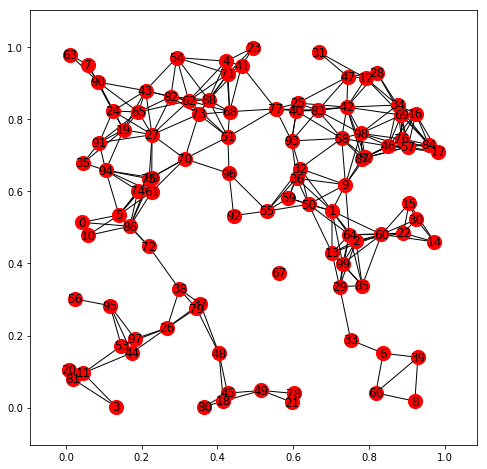

In [20]:
G=nx.random_geometric_graph(100,0.151)
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)

plt.figure(figsize=(8,8))
nx.draw_networkx(G, pos, node_size =200)

# plt.savefig('random_geometric_graph.png')
plt.show()



SIS

In [21]:
# G = nx.erdos_renyi_graph(10,.3)
N = G.number_of_nodes()

beta = 1.2; delta = 2;
Para = Para_SIS(delta,beta)

x0 = np.zeros(N)
x0 = Initial_Cond_Gen(N, Para[1][0], 2, x0)

Net = NetCmbn([MyNet(G)])
StopCond = ['RunTime', 10]


In [22]:
t, f = MonteCarlo(Net, Para,  StopCond, 1, 3, .1, 20, N, x_init = np.zeros(N) )

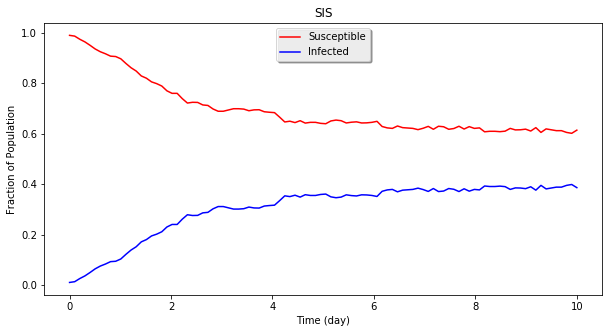

In [26]:
fig2 = plt.figure(figsize=(10,5))
# for i in range(M):
# plt.plot(T, StateCount[0,:]/N,'r',label='Susceptible')
plt.plot(t,f[0,:],'r',label='Susceptible')
plt.plot(t,f[1,:],'b',label='Infected')
# plot(t,f[2,:],'g',label='Recovered')
# plt.savefig("SIS.png")

plt.xlabel('Time (day)')
plt.ylabel('Fraction of Population')
plt.title('SIS')
plt.legend(loc='upper center', shadow=True)
plt.show()
# plt.savefig("SIS_MonteCarlo.png")

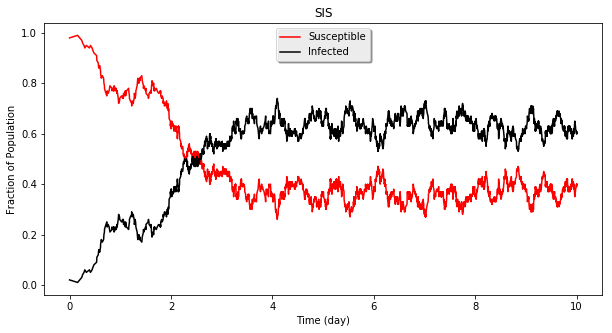

In [30]:
ts, n_index, i_index, j_index = GEMF_SIM(Para, Net, x0, StopCond,N)




M = Para[0]
T, StateCount = Post_Population(x0, M, N, ts, i_index, j_index)

fig = plt.figure(figsize=(10,5))
# for i in range(M):
# plt.plot(T, StateCount[0,:]/N,'r',label='Susceptible')
plt.plot(T, StateCount[0,:]/N,'r',label='Susceptible')
plt.plot(T, StateCount[1,:]/N,'k',label='Infected')
# plt.plot(T, StateCount[2,:]/N,'y',label='Recovered')

plt.xlabel('Time (day)')
plt.ylabel('Fraction of Population')
plt.title('SIS')
plt.legend(loc='upper center', shadow=True)
plt.show()
# plt.savefig("SIS.png")

#### An example animation for SIS. For animating ther models, changes

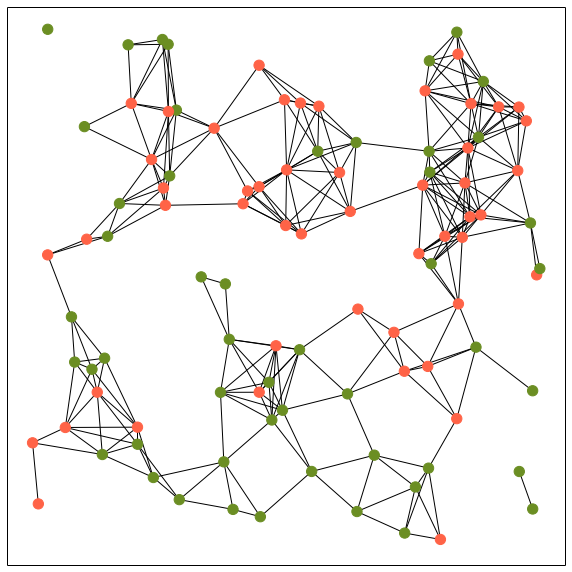

In [10]:
fig = plt.figure(figsize = (10, 10))

comp = ['S', 'I' ]
colors = ['olivedrab', 'tomato']
col = dict(zip(comp, colors))

model = [x0, n_index, i_index, j_index]
anim = animate_discrete_property_over_graph(G, model, len(ts)-1, fig, n_index,i_index, j_index, comp, 'state',
                                            col, pos = pos, Node_radius = .01)
##ALERT-----before saving: Just be careul when you save the movie, cause it takes too much time, i.e., each event is a frame.
anim.save('myTest.mp4')

# Timing

In [7]:
import timeit

In [8]:
%%timeit
ts, n_index, i_index, j_index = GEMF_SIM(Para, Net, x0, StopCond,N)

10 loops, best of 3: 30.9 ms per loop


# SIR

In [11]:
# G = nx.erdos_renyi_graph(10,.3)
N = G.number_of_nodes()

beta = 1.2; delta = 2;
Para = Para_SIR(delta,beta)

x0 = np.zeros(N)
x0 = Initial_Cond_Gen(N, Para[1][0], 2, x0)

Net = NetCmbn([MyNet(G)])
StopCond = ['RunTime', 10]


#### Multiple simulations

In [12]:
t, f = MonteCarlo(Net, Para,  StopCond, 1, 3, .1, 50, N, x_init = np.zeros(N) )

In [13]:
fig2 = plt.figure(figsize=(10,5))
# for i in range(M):
# plt.plot(T, StateCount[0,:]/N,'r',label='Susceptible')
plot(t,f[0,:],'r',label='Susceptible')
plot(t,f[1,:],'b',label='Infected')
plot(t,f[2,:],'g',label='Recovered')
# plt.savefig("SIS.png")

plt.xlabel('Time (day)')
plt.ylabel('Fraction of Population')
plt.title('SIS')
legend = plt.legend(loc='upper center', shadow=True)
# plt.savefig("SIS_MonteCarlo.png")

#### One run

Simulation time (7.48634338379e-05s).


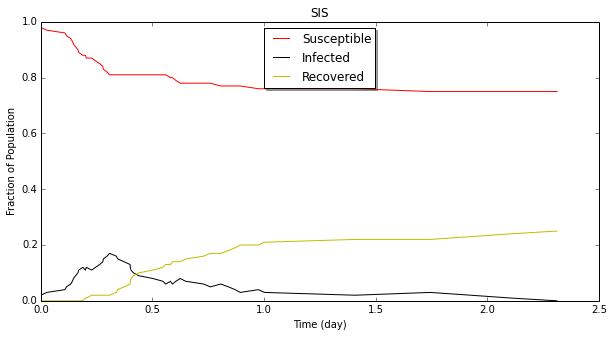

In [19]:
ts, n_index, i_index, j_index = GEMF_SIM(Para, Net, x0, StopCond,N)
start = time()
print 'Simulation time ({}s).'.format( time()-start )

col = dict(zip(comp, colors))

# nx.draw_graphviz(G)


M = Para[0]
T, StateCount = Post_Population(x0, M, N, ts, i_index, j_index)

fig = plt.figure(figsize=(10,5))
# for i in range(M):
# plt.plot(T, StateCount[0,:]/N,'r',label='Susceptible')
plt.plot(T, StateCount[0,:]/N,'r',label='Susceptible')
plt.plot(T, StateCount[1,:]/N,'k',label='Infected')
plt.plot(T, StateCount[2,:]/N,'y',label='Recovered')

plt.xlabel('Time (day)')
plt.ylabel('Fraction of Population')
plt.title('SIS')
legend = plt.legend(loc='upper center', shadow=True)
# plt.savefig("SIR.png")

In [21]:
fig = plt.figure(figsize = (10, 10))

comp = ['S', 'I', 'R']
colors = ['olivedrab', 'tomato', 'gray']
col = dict(zip(comp, colors))

model = [x0, n_index, i_index, j_index]

anim = animate_discrete_property_over_graph(G, model, len(ts)-1, fig, n_index,i_index, j_index, comp, 'state',
                                            col, pos = pos, Node_radius = .01)
##ALERT-----before saving: Just be careul when you save the movie, cause it takes too much time.
anim.save('myTestSIR.mp4')